In [4]:
# 3.	Import the required packages with their customary aliases as follows:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# 4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

gdp_df = pd.read_csv(r'C:\Users\rache\OneDrive\Documents\NSS\Python\da16-python-gdp-and-internet-use-analysis-rachelhudak\data\gdp_per_capita.csv')

In [17]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [15]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [19]:
5. How many rows and columns are in `gdp_df`? What are the data types of each column?

gdp_df.info()

Object `column` not found.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [21]:
gdp_df.describe()

,Year,Value,Value Footnotes
count,8219.000000,8219.000000,0.0
mean,2006.672345,20270.976242,NaN
std,9.782986,22532.004246,NaN
min,1990.000000,510.822823,NaN
25%,1998.000000,4284.868430,NaN
50%,2007.000000,11916.457927,NaN
75%,2015.000000,28543.305542,NaN
max,2023.000000,174339.077325,NaN


In [50]:
# 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.
#rename the remaining 3 to 'Country', 'Year', and 'GDP_Per_Capita'.

import os
print("PARENT CONTENTS:", os.listdir(".."))
print("DATA CONTENTS:", os.listdir("../data"))

import pandas as pd
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")
gdp_df.head()






PARENT CONTENTS: ['.git', '.gitignore', '.ipynb_checkpoints', 'data', 'notebooks', 'README.md', 'to check', 'Untitled.ipynb']
DATA CONTENTS: ['.ipynb_checkpoints', 'gdp_per_capita.csv', 'internet.csv', 'notebooks']


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [49]:
gdp_df_droppedVF = (
    gdp_df
    .drop(columns=["Value Footnotes"])
    .rename(columns={
        "Country Name": "Country",
        "Year": "Year",
        "Value": "GDP_Per_Capita"
    })
)

# Round GDP_Per_Capita to 2 decimal places
gdp_df_droppedVF["GDP_Per_Capita"] = gdp_df_droppedVF["GDP_Per_Capita"].round(2)

gdp_df_droppedVF.head()


,Country or Area,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.42
1,Afghanistan,2022,1981.71
2,Afghanistan,2021,2144.17
3,Afghanistan,2020,2769.69
4,Afghanistan,2019,2927.25


In [ ]:
# 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [61]:
# 7. How many countries have data for all years?


years_per_country = gdp_df_droppedVF.groupby("Country or Area")["Year"].nunique()

total_years = gdp_df_droppedVF["Year"].nunique()

num_complete_countries = (years_per_country == total_years).sum()

num_complete_countries




np.int64(228)

In [62]:
#7# Which countries are missing many years of data?


years_per_country = gdp_df_droppedVF.groupby("Country or Area")["Year"].nunique()
total_years = gdp_df_droppedVF["Year"].nunique()

missing_years = (total_years - years_per_country).sort_values(ascending=False)

missing_years[missing_years > 0]


Country or Area
Djibouti                     23
Turks and Caicos Islands     21
Sint Maarten (Dutch part)    19
Kosovo                       18
Faroe Islands                18
Cayman Islands               16
Virgin Islands               13
CuraÃ§ao                     10
Afghanistan                  10
San Marino                    8
Montenegro                    7
Serbia                        5
West Bank and Gaza            4
Greenland                     2
Bhutan                        1
Lebanon                       1
Tonga                         1
Syrian Arab Republic          1
Somalia                       1
Name: Year, dtype: int64

In [ ]:
#7 Look at the number of observations per year. What do you notice? 

In [ ]:
# 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


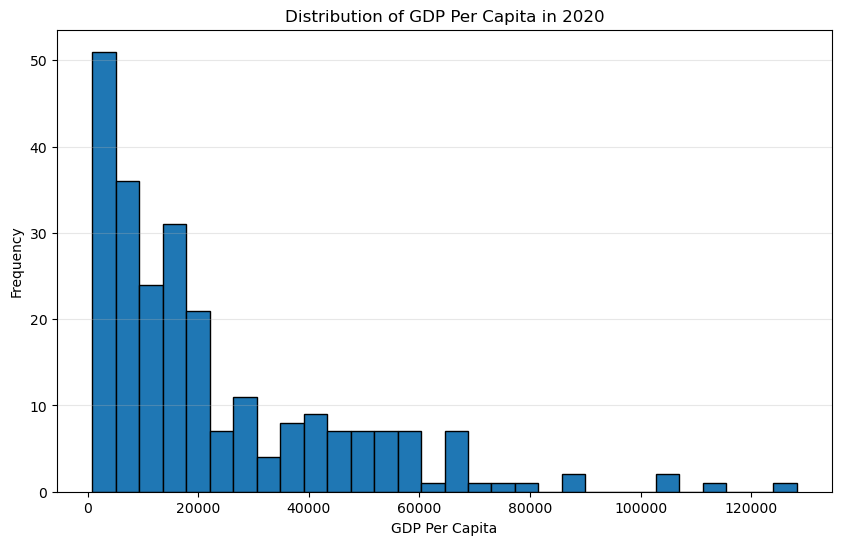

In [43]:
#8 histogram to show the distribution of GDP per capita for the year 2020

import matplotlib.pyplot as plt

gdp_2020 = gdp_df_droppedVF[gdp_df_droppedVF["Year"] == 2020]["GDP_Per_Capita"]


plt.figure(figsize=(10,6))
plt.hist(gdp_2020, bins=30, edgecolor='black')
plt.title("Distribution of GDP Per Capita in 2020")
plt.xlabel("GDP Per Capita")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)

plt.show()


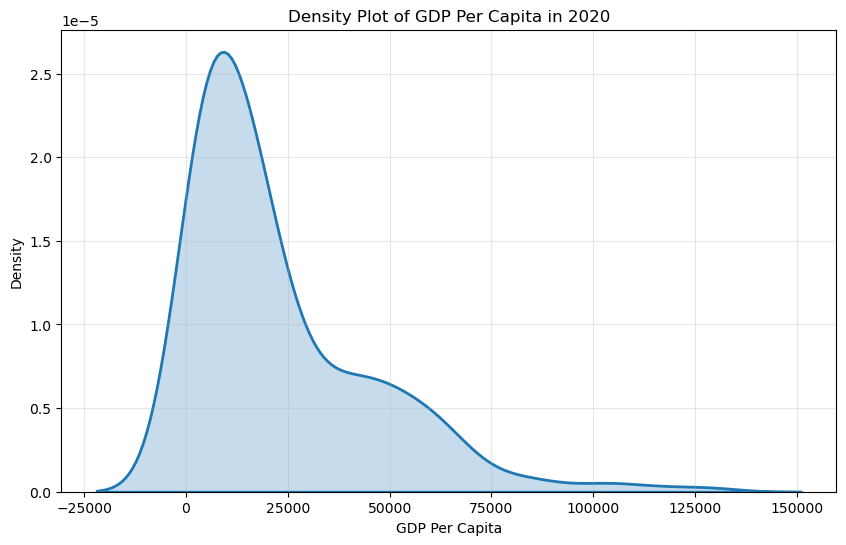

In [44]:
#8 density plot to show the distribution of GDP per capita for the year 2020
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn makes KDE plots much easier

gdp_2020 = gdp_df_droppedVF[gdp_df_droppedVF["Year"] == 2020]["GDP_Per_Capita"]


plt.figure(figsize=(10,6))
sns.kdeplot(gdp_2020, fill=True, linewidth=2)

plt.title("Density Plot of GDP Per Capita in 2020")
plt.xlabel("GDP Per Capita")
plt.ylabel("Density")
plt.grid(alpha=0.3)
plt.show()


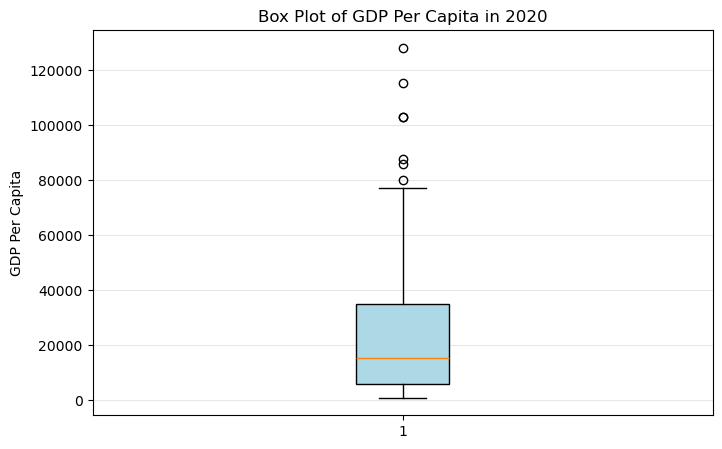

In [45]:
#8 box plot to show the distribution of GDP per capita for the year 2020

import matplotlib.pyplot as plt

gdp_2020 = gdp_df_droppedVF[gdp_df_droppedVF["Year"] == 2020]["GDP_Per_Capita"]

plt.figure(figsize=(8, 5))
plt.boxplot(gdp_2020, vert=True, patch_artist=True,
            boxprops=dict(facecolor="lightblue"))

plt.title("Box Plot of GDP Per Capita in 2020")
plt.ylabel("GDP Per Capita")
plt.grid(axis='y', alpha=0.3)

plt.show()


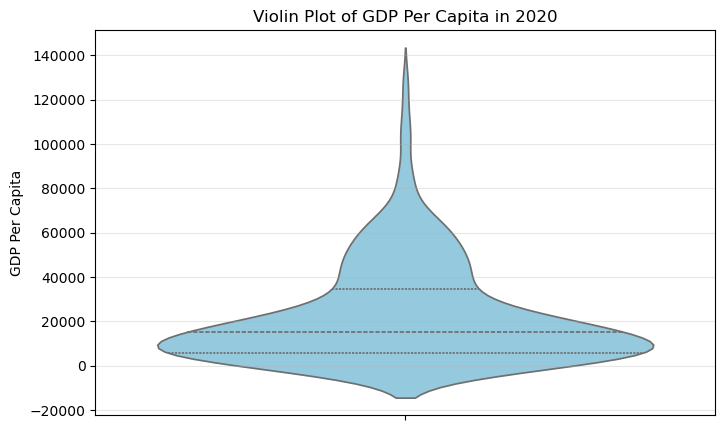

In [46]:
#8 box plot to show the distribution of GDP per capita for the year 2020

import matplotlib.pyplot as plt
import seaborn as sns

gdp_2020 = gdp_df_droppedVF[gdp_df_droppedVF["Year"] == 2020]["GDP_Per_Capita"]

plt.figure(figsize=(8, 5))
sns.violinplot(y=gdp_2020, inner='quartile', color="skyblue")

plt.title("Violin Plot of GDP Per Capita in 2020")
plt.ylabel("GDP Per Capita")
plt.grid(axis='y', alpha=0.3)

plt.show()


In [ ]:
# 8. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


In [48]:
# 9. What was the median GDP per capita value in 2020?

median_gdp_2020 = gdp_df_droppedVF[gdp_df_droppedVF["Year"] == 2020]["GDP_Per_Capita"].median()
round(median_gdp_2020, 2)



15309.24

In [ ]:
# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
# 	* A boxplot           
# 	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
# 	* A scatterplot
# 	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

In [51]:
#10 Subset
gdp_decades = gdp_df_droppedVF[gdp_df_droppedVF["Year"].isin([1990, 2000, 2010, 2020])]

gdp_decades.head()


,Country or Area,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.69
13,Afghanistan,2010,2848.59
23,Afghanistan,2000,1617.83
27,Africa Eastern and Southern,2020,3861.11
37,Africa Eastern and Southern,2010,3863.84


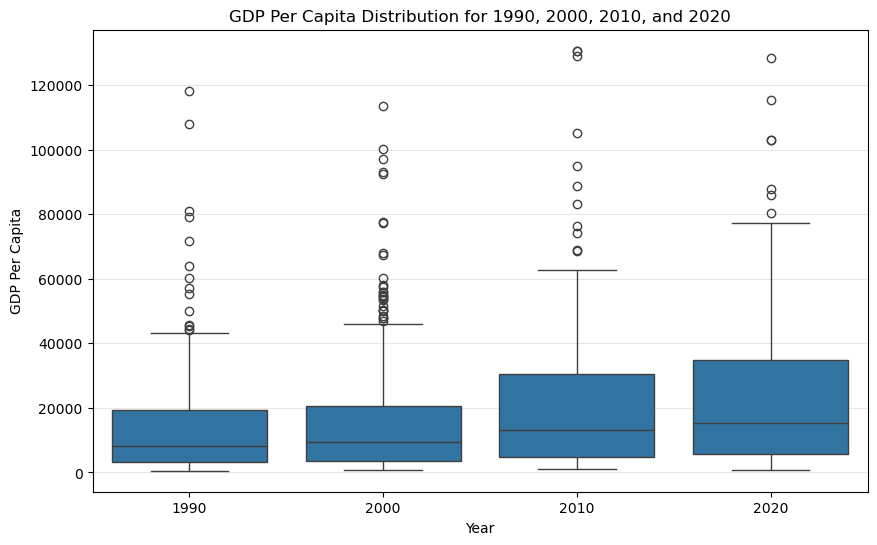

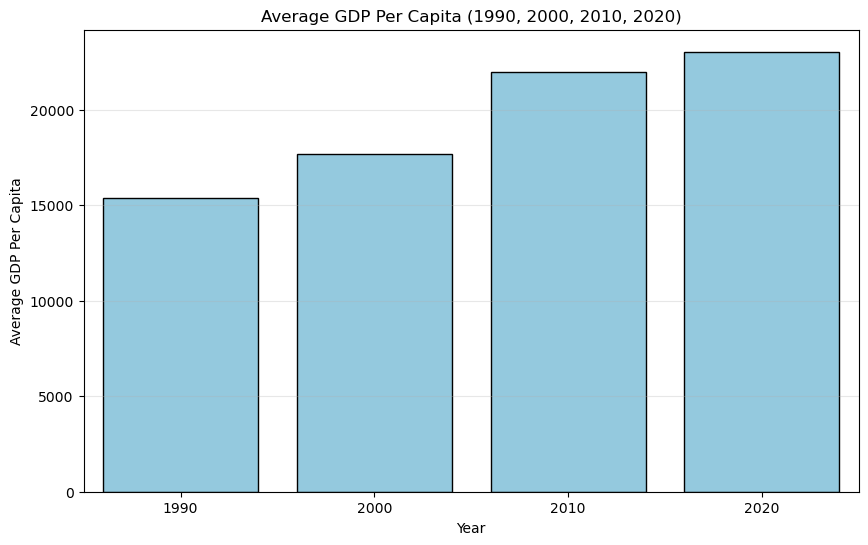

In [55]:
#10 bar plot

import matplotlib.pyplot as plt
import seaborn as sns

gdp_bar = gdp_decades.groupby("Year")["GDP_Per_Capita"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=gdp_bar,
    x="Year",
    y="GDP_Per_Capita",
    color="skyblue",
    edgecolor="black"
)

plt.title("Average GDP Per Capita (1990, 2000, 2010, 2020)")
plt.xlabel("Year")
plt.ylabel("Average GDP Per Capita")
plt.grid(axis="y", alpha=0.3)

plt.show()


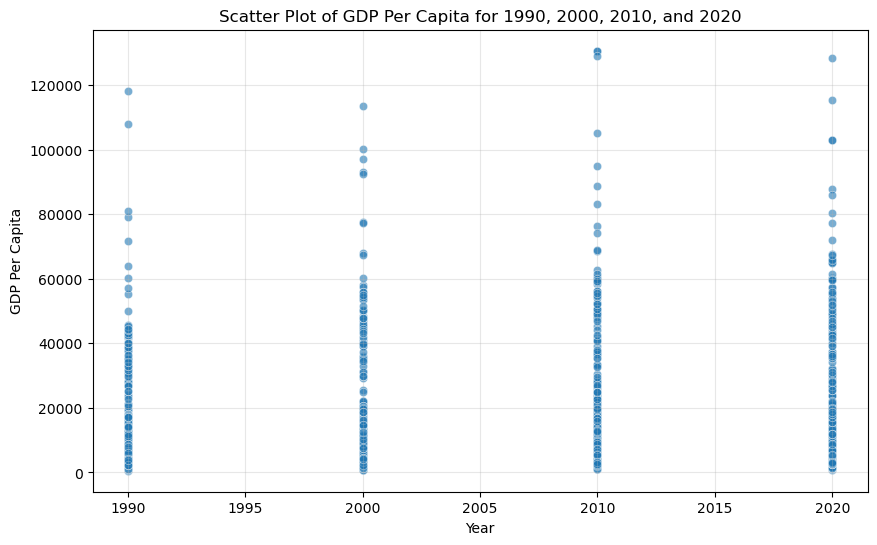

In [56]:
#10 Scatter Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.scatterplot(
    data=gdp_decades,
    x="Year",
    y="GDP_Per_Capita",
    alpha=0.6
)

plt.title("Scatter Plot of GDP Per Capita for 1990, 2000, 2010, and 2020")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.grid(alpha=0.3)

plt.show()


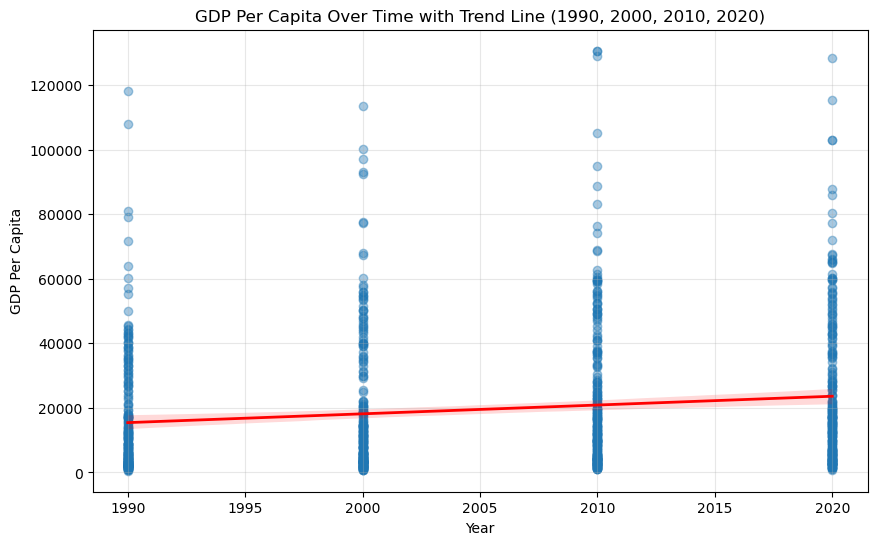

In [57]:
#10 with regression line 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.regplot(
    data=gdp_decades,
    x="Year",
    y="GDP_Per_Capita",
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "red", "linewidth": 2}
)

plt.title("GDP Per Capita Over Time with Trend Line (1990, 2000, 2010, 2020)")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.grid(alpha=0.3)

plt.show()


In [ ]:
# Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [ ]:
# 11. Which country was the first to have a GDP per capita greater than $100,000?

In [63]:
#11 

high_gdp = gdp_df_droppedVF[gdp_df_droppedVF["GDP_Per_Capita"] > 100000]

first_high_gdp = high_gdp.sort_values("Year").iloc[0]

first_high_gdp


Country or Area       Brunei
Year                    1990
GDP_Per_Capita     118163.68
Name: 974, dtype: object

In [ ]:
# 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [69]:
#12 
gdp_2020 = gdp_df_droppedVF[gdp_df_droppedVF["Year"] == 2020]

highest_2020 = gdp_2020.loc[gdp_2020["GDP_Per_Capita"].idxmax()]


'Luxembourg'

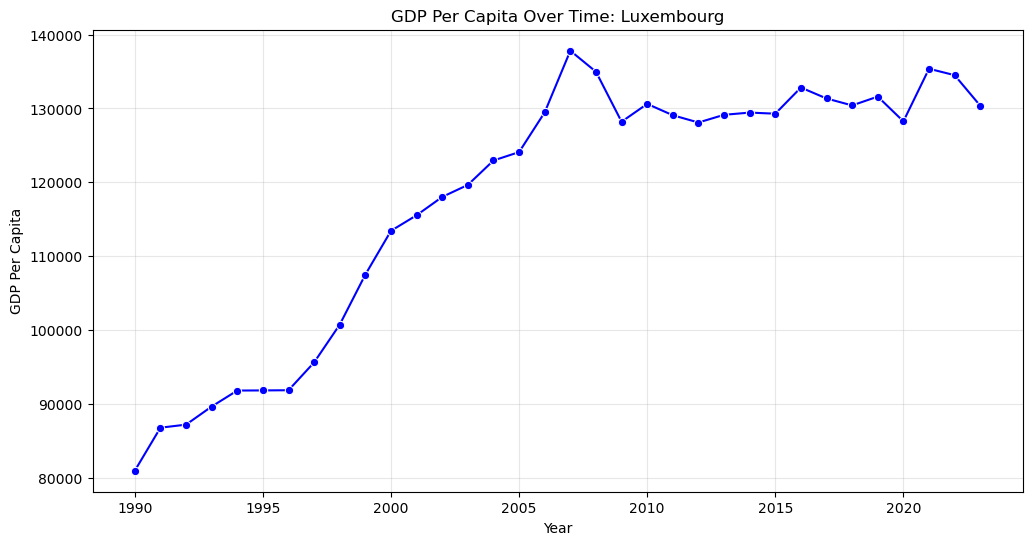

In [71]:
# 12
import matplotlib.pyplot as plt
import seaborn as sns

country_trend = gdp_df_droppedVF[gdp_df_droppedVF["Country or Area"] == top_country]


plt.figure(figsize=(12,6))
sns.lineplot(
    data=country_trend,
    x="Year",
    y="GDP_Per_Capita",
    marker="o",
    color="blue"
)

plt.title(f"GDP Per Capita Over Time: {top_country}")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.grid(alpha=0.3)

plt.show()


In [ ]:
# 1. Take a look at the two CSV's in the data folder. 
#     a. **You never want to open a CSV in excel that you plan to use in python. When opened, a CSV can have formatting changes introduced by Excel** 
#     b. Instead, make a copy of each, and paste it somewhere else. Then, open the files that you copied in Excel to inspect. Be sure to only open the copies.
# 2.	Create a folder in your repo named 'notebooks'.This is where you will save all of your jupyter notebooks for python.  
#  - **IMPORTANT:**  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
#   - Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from `Code` to `Markdown`.
# 3.	Import the required packages with their customary aliases as follows:
#     `import pandas as pd`   
#     `import numpy as np`  
#     `import matplotlib.pyplot as plt`  
#     `import seaborn as sns`
# 4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.
# 5. How many rows and columns are in `gdp_df`? What are the data types of each column?
# 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.
# 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 
# 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
# 9. What was the median GDP per capita value in 2020?
# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
# 	* A boxplot
# 	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
# 	* A scatterplot
# 	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
# Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.
# 11. Which country was the first to have a GDP per capita greater than $100,000?
# 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.
# 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?
# 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.
# 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.
# 16. Look at the number of observations in this dataset per year. What do you notice?
# 17. What is the first year to have a non-zero internet users percentage value?
# 18. How does the distribution of internet users percent differ for 2000 and 2014?
# 19. For how many countries was the percentage of internet users below 5% in 2014?
# 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.
# 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?
# 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.
# 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.
# 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".
# 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?


In [38]:
# ## A Guided Exploration of UN Data (Gross Domestic Product and Internet Usage)

# 1. Take a look at the two CSV's in the data folder. 
#     a. **You never want to open a CSV in excel that you plan to use in python. When opened, a CSV can have formatting changes introduced by Excel** 
#     b. Instead, make a copy of each, and paste it somewhere else. Then, open the files that you copied in Excel to inspect. Be sure to only open the copies.
# 2.	Create a folder in your repo named 'notebooks'.This is where you will save all of your jupyter notebooks for python.  
#  - **IMPORTANT:**  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
#   - Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from `Code` to `Markdown`.
# 3.	Import the required packages with their customary aliases as follows:
#     `import pandas as pd`   
#     `import numpy as np`  
#     `import matplotlib.pyplot as plt`  
#     `import seaborn as sns`
# 4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.
# 5. How many rows and columns are in `gdp_df`? What are the data types of each column?
# 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.
# 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 
# 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
# 9. What was the median GDP per capita value in 2020?
# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
# 	* A boxplot           
# 	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
# 	* A scatterplot
# 	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
# Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.
# 11. Which country was the first to have a GDP per capita greater than $100,000?
# 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.
# 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?
# 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.
# 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.
# 16. Look at the number of observations in this dataset per year. What do you notice?
# 17. What is the first year to have a non-zero internet users percentage value?
# 18. How does the distribution of internet users percent differ for 2000 and 2014?
# 19. For how many countries was the percentage of internet users below 5% in 2014?
# 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.
# 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?
# 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.
# 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.
# 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".
# 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

# ### Bonus exercise:
# 1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.
